# Data Analysis
2023-March-03, NSYSU, Exp. course 

[lecture homepage](https://github.com/baobabyoo/Lecture_DataAnalysis)

## Importing packages

In [2]:
import os, sys, time

sys.path
sys.path.append('./')

import numpy as np
from scipy.optimize import curve_fit

import matplotlib
matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Defining functions

In [3]:
def myline(x, a, b):
    '''
    A function to return y = ax + b
    
    Input:
        x [double] : the x-axis coordinate 
        a [double] : slope of a 1st order polynomial
        b [double] : offset of a 1st order polynomial
        
    Return:
        y [double] : the y-axis value
    '''
    y = a * x + b
    
    return y

def gaussian_1d(x, amp, x0, sigma):
    '''
    Return a Gaussian distribution that is normalized to 1.0
             
    Input:
        x [double]       : offset
        amp [double]     : amplitude
        x0 [double]      : central position of the Gaussian
        sigma [double]   : standard deviation of the Gaussian
            
    Return:
        [double]   : A 1-dim Gaussian function
    '''
    
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    xdiff = x - x0    
    B = -0.5 * (( xdiff/sigma )**2.0)

    return amp * A * np.exp(B)


## 1. Plotting (A look at 1D Gaussian random variable and uniform random variable)

### 1.1 Producing some data to plot

In [4]:
num_x = 300
x = np.arange(num_x)

mu     = 10.0
sigma  = 3.0
y_gaus = np.random.normal(loc=mu, scale=sigma, size=num_x)

low    = -8.0
high   = 2.0
y_unif = np.random.uniform(low=low, high=high, size=num_x)

### 1.2 Plotting data

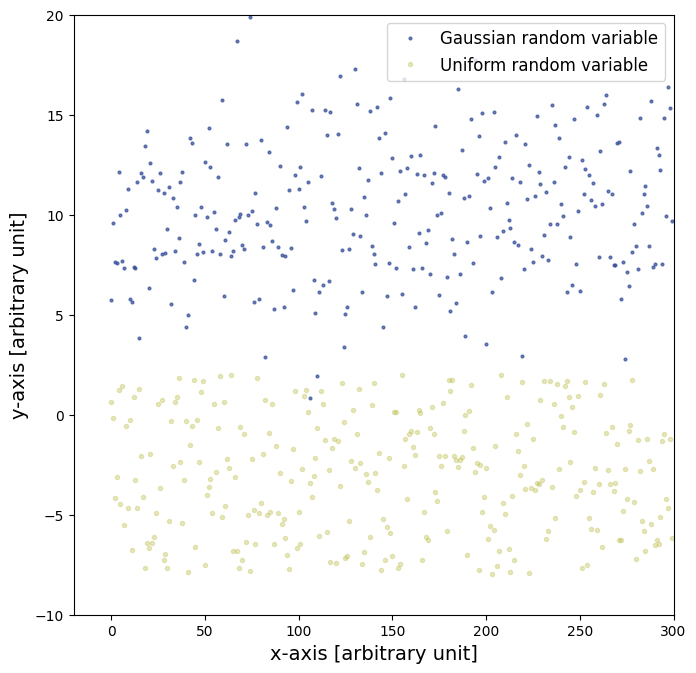

In [5]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(
    x,
    y_gaus,
    'o', # symbol shape
    color=(0.2,0.3,0.6, 0.7), # (R, G, B, transparency), ranged between [0, 1]
    markersize=2, 
    label = "Gaussian random variable"
        )

plt.plot(
    x,
    y_unif,
    'o', # symbol shape
    color=(0.7,0.7,0.2, 0.3), # (R, G, B, transparency), ranged between [0, 1]
    markersize=3, 
    label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# Setting the plot range
plt.xlim( (-20, num_x) )
plt.ylim( (-10, 20) )

# PDF file output
plt.savefig('Gaussian_random_xy.pdf', 
            transparent = True
           )

### 1.3 plotting histogram

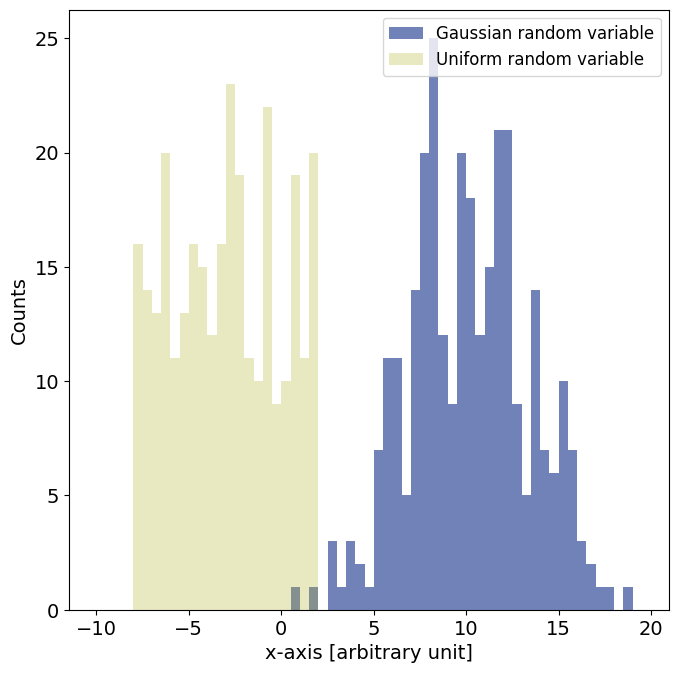

In [6]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('Counts', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

bins = np.arange(-10, 20, 0.5)


plt.hist(y_gaus, 
         bins=bins, color=(0.2,0.3,0.6, 0.7),
         label = "Gaussian random variable"
        )

plt.hist(y_unif, 
         bins=bins, color=(0.7,0.7,0.2, 0.3),
         label = "Uniform random variable"
        )

# Setting the figure legend 
plt.legend(loc=1, fontsize=12)

# PDF file output
plt.savefig('Gaussian_random_histogram.pdf', 
            transparent = True
           )

## 2. Data I/O

### 2.1 Generating data

In [7]:
num_x = num_x
low   = 0
high  = 100
x = np.random.uniform(low=low, high=high, size=num_x)

a       = 10.0
b       = 100.0
sigma_y = 30.0

y_err = np.random.normal(loc=0, scale=sigma_y, size=num_x)
y     = myline(x, a, b) + y_err
print(y)

[ 179.23839621  875.17497696   73.91110699  977.43765597  717.77888224
  665.83182933  501.41697922  188.41583102  230.73144458 1076.89233444
  272.37220482  411.93146728  665.21499578  439.86257769  934.71716988
  568.46838469  756.46661705  170.73487478  829.52351565  794.70426629
  854.66648762  478.66624381  696.77151143  666.53497871  827.55894246
  640.84583848  744.75067792  155.23604492  854.80985063  400.79540217
  453.92257734  871.12267259  796.71111103 1013.26786479 1005.04232381
   67.7226868  1022.07507715  257.72240771  511.13700616  681.80786807
  374.94215054  270.76904238  131.84857859  349.00560417  363.33059391
  725.17142769  489.68610915  199.99159495  455.03335838  467.78276221
  510.62957678  305.89213481  539.63358974  417.17224941  897.32396487
  415.5071682   788.53988481 1046.05411551  999.5049465   685.54479474
  999.11003311  148.42289921  750.54714416  495.86903407  606.31969319
  741.21550151  645.43986817  405.86174045  347.80438686  583.21605901
  409.

### 2.2 Standard data output, and data input with numpy.loadtxt

#### 2.2.1 Standard file output

In [8]:
filename = 'data_1dpoly.txt'

# remove the file in case it exist
os.system('rm -rf '+ filename)

# open output file
f = open(filename, "w")

for i in range(0,num_x):
    out_string = str(x[i]) + ' ' + str(y[i]) + ' '  +  str(sigma_y) +'\n' # '\n is a line break'
    f.write(out_string)

# close output file
f.close()

#### 2.2.2 Read space-separated values using numpy.loadtxt method

In [9]:
x, y, y_err = np.loadtxt(filename, 
                  usecols=(0, 1, 2),
                  unpack = True
                 )
print ("##### Loaded x values")
print(x)
print(' ')
print ("##### Loaded y values")
print(y)
print(' ')
print ("##### Loaded y errors")
print(y_err)

##### Loaded x values
[10.41386824 80.18206621  1.80916696 89.1312845  57.44937909 53.85168296
 38.2799642   6.30756744 14.80228546 93.45179709 17.81571462 30.7219227
 55.72834947 32.88248657 81.85703527 47.82209636 67.04867308  6.46178624
 73.39967224 70.6373634  77.62791246 38.98315362 58.19585439 55.98610689
 74.26435476 55.16322546 63.67544918  9.05075483 78.23783126 29.21091377
 32.32281644 72.45569372 68.2701759  91.82904729 86.12716768  2.65811972
 90.11396968 16.20047952 41.31460436 60.79542221 27.07566201 20.73815246
  4.35519057 22.37515512 27.65735873 61.07156985 42.38263419  8.12143406
 35.91947303 35.74036778 42.73591038 21.20077713 44.57701829 31.90977755
 81.7139666  34.85331414 70.28411087 92.85436288 88.19817161 58.15491971
 89.93176302  8.98661242 65.61002233 38.35236652 51.48949239 60.54161796
 51.75320642 33.61796418 23.58657901 47.09183998 29.3673942  23.99614082
 72.08375822 61.49187362 48.08657444 74.50649888 65.62417758 32.54569452
 91.41929624 30.89462539 98.91

### 2.3 Data I/O with pandas

#### 2.3.1 Creating a pandas dataframe and output to comma-separated-values files (csv files)

In [10]:
data = {'x': x,
        'y': y,
        'y_err': np.zeros(len(y)) + sigma_y
       }
df = pd.DataFrame(data)
print(df)

filename = 'data_1dpoly.csv'
os.system('rm -rf ' + filename)
df.to_csv(filename, index=False)

             x           y  y_err
0    10.413868  179.238396   30.0
1    80.182066  875.174977   30.0
2     1.809167   73.911107   30.0
3    89.131284  977.437656   30.0
4    57.449379  717.778882   30.0
..         ...         ...    ...
295  40.848982  539.314872   30.0
296  39.505189  550.554886   30.0
297  27.265645  299.296197   30.0
298  26.605461  374.684084   30.0
299  55.224148  712.695720   30.0

[300 rows x 3 columns]


### 2.3.2 Reading back the csv file

In [11]:
path = './'
df_read = pd.read_csv(path + filename)

print(df_read)

             x           y  y_err
0    10.413868  179.238396   30.0
1    80.182066  875.174977   30.0
2     1.809167   73.911107   30.0
3    89.131284  977.437656   30.0
4    57.449379  717.778882   30.0
..         ...         ...    ...
295  40.848982  539.314872   30.0
296  39.505189  550.554886   30.0
297  27.265645  299.296197   30.0
298  26.605461  374.684084   30.0
299  55.224148  712.695720   30.0

[300 rows x 3 columns]


In [12]:
# examining the read x-values and y-values
print(df_read.x)
print(' ')
print(df_read.y)

0      10.413868
1      80.182066
2       1.809167
3      89.131284
4      57.449379
         ...    
295    40.848982
296    39.505189
297    27.265645
298    26.605461
299    55.224148
Name: x, Length: 300, dtype: float64
 
0      179.238396
1      875.174977
2       73.911107
3      977.437656
4      717.778882
          ...    
295    539.314872
296    550.554886
297    299.296197
298    374.684084
299    712.695720
Name: y, Length: 300, dtype: float64


#### 2.3.3 Plotting the loaded data

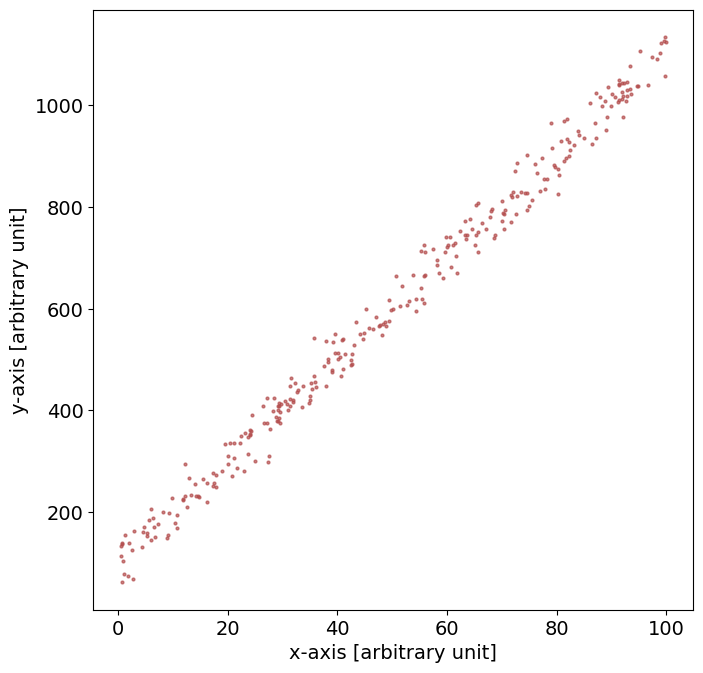

In [13]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

plt.plot(x, y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )




## 3. Data modeling

### Defining functions

In [14]:
def chisquare(y, y_err, ymodel):
    '''
    Return the chi-square given the measurements of y, y-error, and a model of the measurements y.
    
    Input:
        y [np array]      : measurements
        y_err [np array]  : measurement errors
        ymodel [np array] : a model of y 
    
    Return:
        chisquare [double] : the chi-square value
    
    '''
    
    return np.sum( ( (y - ymodel) / y_err)**2 )

### 3.1 A demonstration of the Metropolis-Hasting algorithm
Using a Mexican hat distribution function as an example

#### 3.1.1 Defining a Mexican hat

In [29]:
def mexhat(a):
    '''
    A Mexican hat function.
    
    Input:
      a [double]: the a variable.
      
    Return:
      probability [double]: probability
    '''
    
    if a >= 1.5:
        return 0.0
    elif a < -1.5:
        return 0.0
    elif ( 
             (a <= 1.5) and (a > 0.5)
            ):
        return 0.25
    elif ( 
             (a >= -1.5) and (a < -0.5)
            ):
        return 0.25
    elif ( 
             (a >= -0.5) and (a <= 0.5)
            ):
        return 0.5

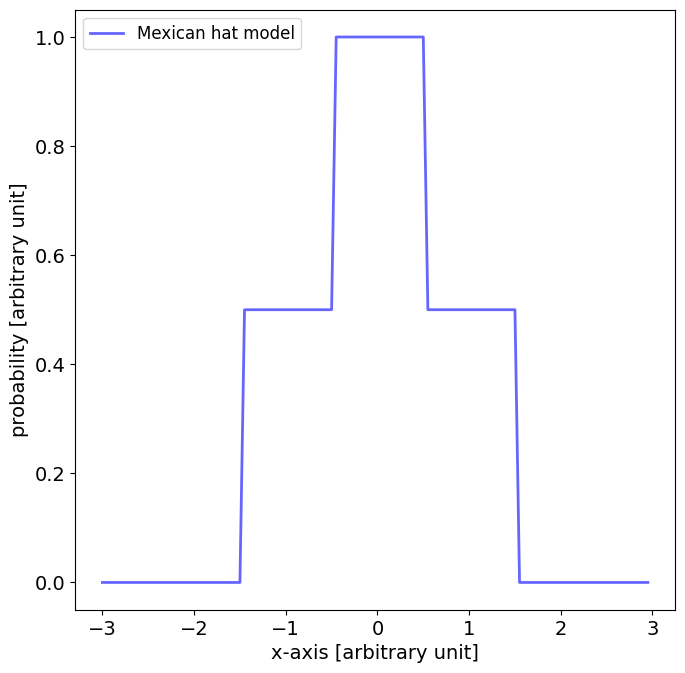

In [43]:
# plotting the mexican hat (normalizing peak to 1.0)

fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

#### 3.2.2 Defining proposal distribution, acceptance probability, and Metropolis-Hasting algorithm

In [68]:
def proposal_dis(a2, a1):
    '''
    Here I simply use an unnormalized flat distribution, i.e., given a1,
    the probability of making transition to any a2 is a constant. 
    Here just return 1.0 since the contribution in the dominator/numeritor will cancel.
    '''
    return 1.0

def acceptance_prob(a2, a1):
    '''
    Given the present a-value (a1) and the next a-vavlue (a2),
    evaluate the acceptance probability alpha and return it.
    
    Input:
        a1, a2 [double]: parameter values
        
    Return:
        acceptance probability
    '''
    numerator =  mexhat(a2) * proposal_dis(a1, a2)
    denominator = mexhat(a1)* proposal_dis(a2, a1)
    if denominator > 0:
        test  = ( mexhat(a2)*proposal_dis(a1, a2) ) / ( mexhat(a1)* proposal_dis(a2, a1))
        alpha = np.min([1, test])
    else:
        alpha = 1.0
    return alpha
    
def metropolis_hasting_flatproposal(a1):
    '''
    Metropolis-Hasting algorithm. Providing an input a-value,
    return the next a-value. Assuming that hte proposal distribution is flat.
    
    Input:
        a1 [double]: present parameter value
        
    Return:
        a2 [double]: next parameter value
    '''
    a2c   = np.random.uniform(low=-3.0, high=3.0, size=1)[0]
    alpha = acceptance_prob(a2c, a1)

    draw  = np.random.rand(1)[0]
    if draw <= alpha:
        return a2c
    else:
        return a1
    
    

#### 3.3.3 Testing out how it works

51


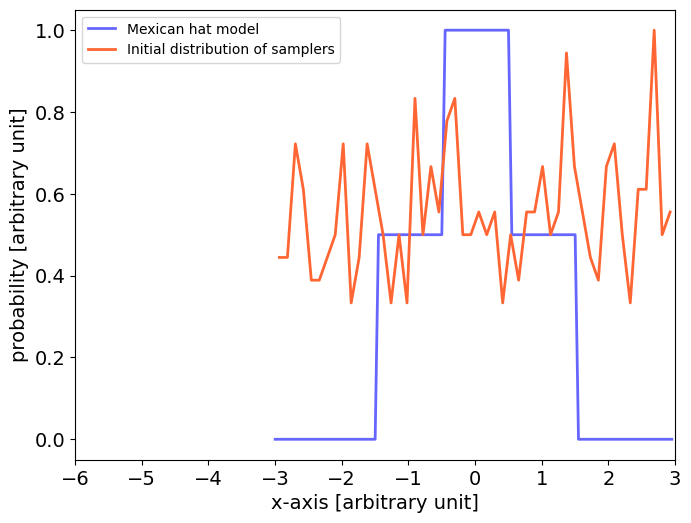

In [93]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = samplers

# how many iterations to advance the samplers
num_itr = 0


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Initial distribution of samplers'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

51


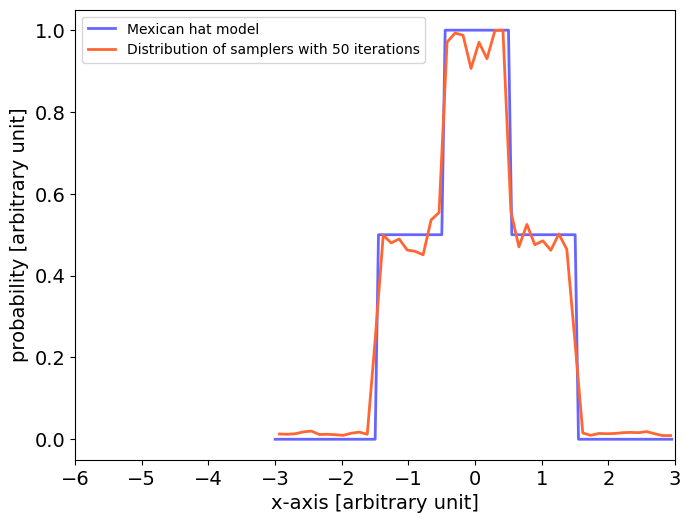

In [94]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = samplers

# how many iterations to advance the samplers
num_itr = 50


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Advancing samplers
for i in range(0, num_itr):
    for j in range(0, num_samplers):
        new_samplers[j] = metropolis_hasting_flatproposal( samplers[j] )
    all_samplers = np.append(all_samplers, new_samplers)
    samplers = new_samplers

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Distribution of samplers with ' + str(num_itr) + ' iterations'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

51


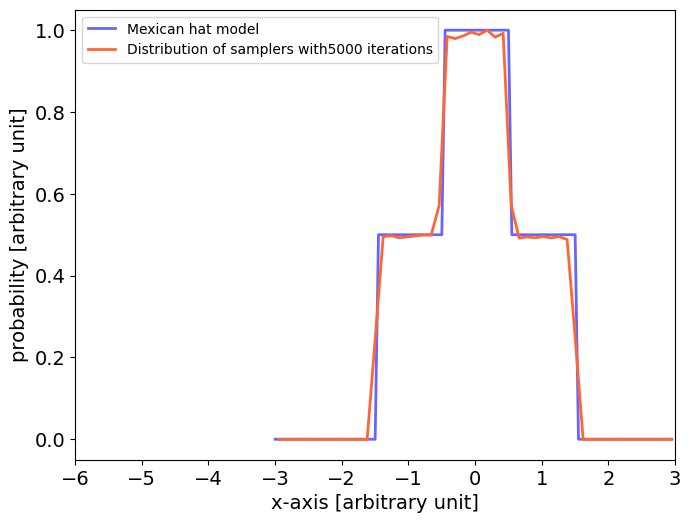

In [95]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = samplers

# how many iterations to advance the samplers
num_itr = 5000


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Advancing samplers
for i in range(0, num_itr):
    for j in range(0, num_samplers):
        new_samplers[j] = metropolis_hasting_flatproposal( samplers[j] )
    all_samplers = np.append(all_samplers, new_samplers)
    samplers = new_samplers

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Distribution of samplers with ' + str(num_itr) + ' iterations'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

51


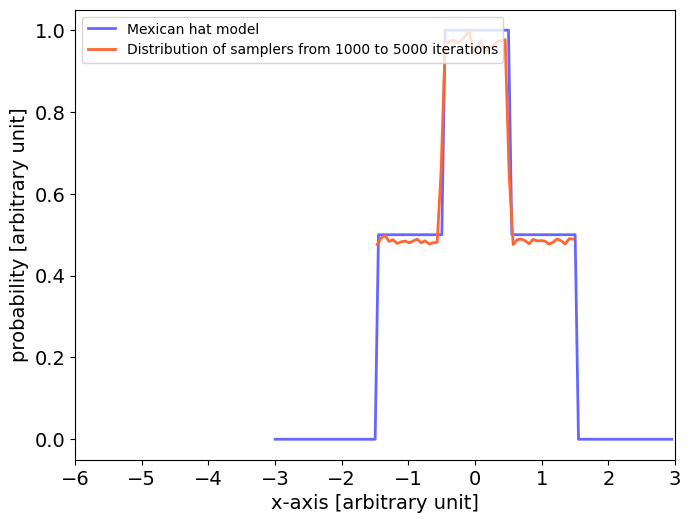

In [97]:
# initializing with 100 samplers, uniforming distributing between [-3, 3]
num_samplers = 500
samplers     = np.random.uniform(low=-3.0, high=3.0, size=num_samplers)
new_samplers = np.zeros(num_samplers)
all_samplers = np.zeros(num_samplers)

# how many iterations to advance the samplers
num_itr = 5000


# Initializing plots
fig = plt.figure(
                 figsize = (8, 6)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('probability [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels

# plotting the probability model
a = np.arange(-3, 3, 0.05)
y = np.zeros(len(a))
for i in range(0, len(a)):
    y[i] = mexhat(a[i])

plt.plot(a, y/np.max(y), '-',
         color = (0.4, 0.4, 1, 1), linewidth = 2.0,
         label = 'Mexican hat model'
        )

# Advancing samplers
for i in range(0, num_itr):
    for j in range(0, num_samplers):
        new_samplers[j] = metropolis_hasting_flatproposal( samplers[j] )
    if i == 1000:
        all_samplers = new_samplers
    elif i > 1000:
        all_samplers = np.append(all_samplers, new_samplers)
    samplers = new_samplers

# producing histogram of the samplers
n_bin = 50
hist, bin_edges = np.histogram(all_samplers, bins=n_bin)
print(len(bin_edges))
bin_centers = np.zeros(n_bin)
for i in range(0, n_bin):
    bin_centers[i] = (bin_edges[i] + bin_edges[i+1])/2.0
    
# plotting a histogram of all samplers
plt.plot(bin_centers, hist/np.max(hist), '-',
         color = (1.0, 0.4, 0.2, 1), linewidth = 2.0,
         label = 'Distribution of samplers from 1000 to 5000 iterations'
        )
    
# Setting the figure legend 
plt.xlim( (-6, 3) )
plt.legend(loc=2, fontsize=10)

### 3.2 MCMC fitting of the 1D polynomial model
y = ax + b

In [15]:
# importing the package for MCMC fittings
import emcee, corner

In [16]:
# allow using multiple processors
from multiprocessing import Pool
from multiprocessing import cpu_count

num_cpu = cpu_count()
print("You have {0} Processors".format(num_cpu))

You have 8 Processors


#### 3.2.1 Definining functions that are required in the MCMC model fittings

In [17]:
def log_prior(parms):
    '''
    Here is basically flat priors over the range [-1e10, 1e10] for both parameters.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        
    Return:
        prob [double] : logged "prior" probability
    '''
    a, b = parms
    if (-1e10 < a < 1e10) and \
       (-1e10 < b < 1e10):
        return 0.0
    
    return -np.inf


def log_likelihood(parms, x, y, y_err):
    '''
    This is the likelihood function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    a, b  = parms
    ymodel = myline(x, a, b)
    
    ln_likelihood = -0.5 * chisquare(y, y_err, ymodel)
    
    return ln_likelihood


def log_probability(parms, x, y, yerr):
    '''
    This is the log probability function.
    
    Input:
        parms [numpy array] : the input variables for the model function.
        x [numpy array] : x-coordinate values
        y [numpy array] : y-coordinate values
        yerr [numpy array] : standard measurement errors of y
    '''
    
    lp = log_prior(parms)
    if not np.isfinite(lp):
        return -np.inf
    
    return lp + log_likelihood(parms, x, y, yerr)

#### 3.2.2 Doing the MCMC fittings
check [this page](https://emcee.readthedocs.io/en/stable/tutorials/parallel/) for how to parallelize this part.

In [18]:
# read data from csv file
path = './'
filename = 'data_1dpoly.csv'
df_read = pd.read_csv(path + filename)

# model setup
init_parms   = np.array( [999.0, 999.0] )
ndim         = len(init_parms)

# MCMC setup
nwalkers        = 16    # number of walkers, which need to be a few times larger than the number of free-parameters
nsteps          = 1000 # number of steps
step_to_discard = 100  # number of steps to be discarded

# initialize walkers at different positions (i.e., initial parameters)
pos = init_parms + np.random.randn(nwalkers, ndim ) * 300

# initializing the emcee samplers
sampler = emcee.EnsembleSampler(
                                nwalkers, ndim, log_probability, 
                                args=(df_read.x, df_read.y, df_read.y_err)
                                )


# advancing the emcee samplers
sampler.run_mcmc(
                 pos, nsteps, progress = True
                )

100%|█████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.94it/s]


State([[ 10.00886523 102.59500998]
 [ 10.0321607  102.83308402]
 [ 10.01064227 106.48015027]
 [ 10.00606027  99.9505063 ]
 [  9.96187052 103.6904132 ]
 [ 10.05437421 100.70702306]
 [  9.9929711  103.86917285]
 [ 10.07427377  97.45218027]
 [ 10.01969174 101.43312324]
 [  9.99975099 100.88468162]
 [ 10.119188    97.21359617]
 [ 10.02885134  99.14525524]
 [  9.98045246 104.48491105]
 [ 10.05716798 101.44450763]
 [ 10.02536501 100.66217448]
 [ 10.09289165  97.64881705]], log_prob=[-138.55454353 -139.27075226 -142.07472786 -139.22374851 -138.82186742
 -138.95868338 -138.73275367 -139.34357954 -138.4995053  -138.85870935
 -140.28763384 -139.07456375 -138.80365451 -139.4261922  -138.55534797
 -139.48208198], blobs=None, random_state=('MT19937', array([1387621891, 2035168761, 4210302716, 2505349814, 2931552653,
       2633687525, 1295935028, 3580620899, 4010674682, 1380454294,
       1007330602,  650047121, 1364531789, 3189561318,  617701102,
        354283557,  747022951, 2053310542,  1879950

#### 3.2.3 Plotting saplers

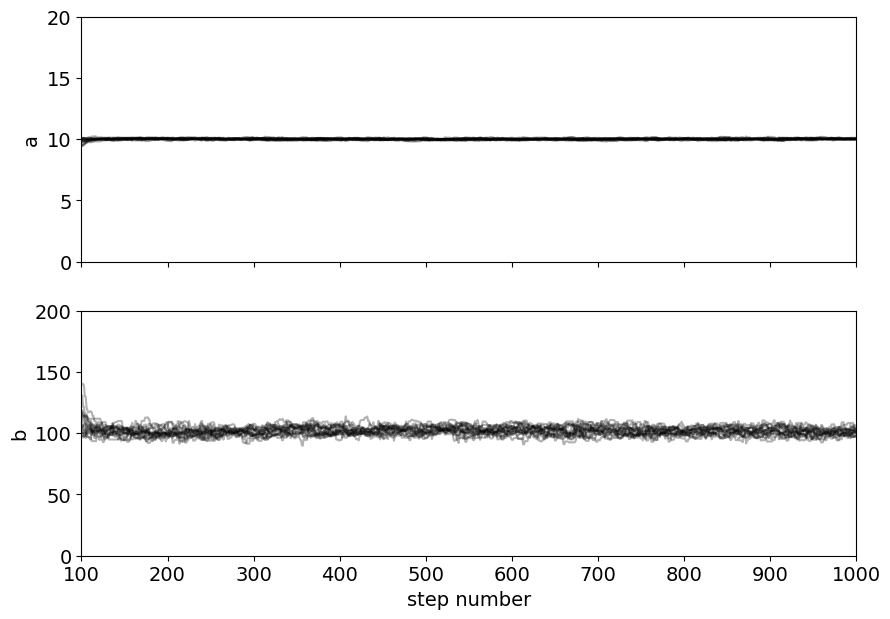

In [19]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)

samples = sampler.get_chain()
num_samples = len(samples)

labels = ["a", "b"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(
            samples[:, :, i], 
            "k", 
            alpha=0.3
           )
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("step number");

# Setting plotting ranges
ax.set_xlim(step_to_discard, num_samples)
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 200)

# PDF file output
plt.savefig('emcee_modeldata_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.4 Making corner plot

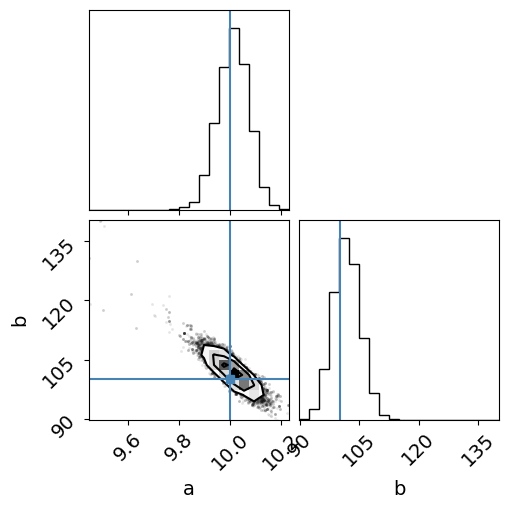

In [20]:
import corner

flat_samples = sampler.get_chain(
                                 discard = step_to_discard, 
                                 #thin = 15, 
                                 flat = True
                                )

fig = corner.corner(
                    flat_samples, labels = labels, truths=[a, b]
                   )

# PDF file output
plt.savefig('emcee_corner_1dpoly.pdf', 
            transparent = True
           )

#### 3.2.5 Summarizing the results of MCMC fittings

In [21]:
mcmc_a = np.percentile(flat_samples[:, 0], [16, 50, 84])
q      = np.diff(mcmc_a)
print('a value is: ' + str(round(mcmc_a[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

mcmc_b = np.percentile(flat_samples[:, 1], [16, 50, 84])
q      = np.diff(mcmc_b)
print('b value is: ' + str(round(mcmc_b[1],2) ) + '-' + str(round(q[0],2) ) +  '/+' + str( round(q[1], 2) ))

a value is: 10.01-0.06/+0.06
b value is: 101.71-3.34/+3.53


#### 3.2.6 Plotting the MCMC fitting results

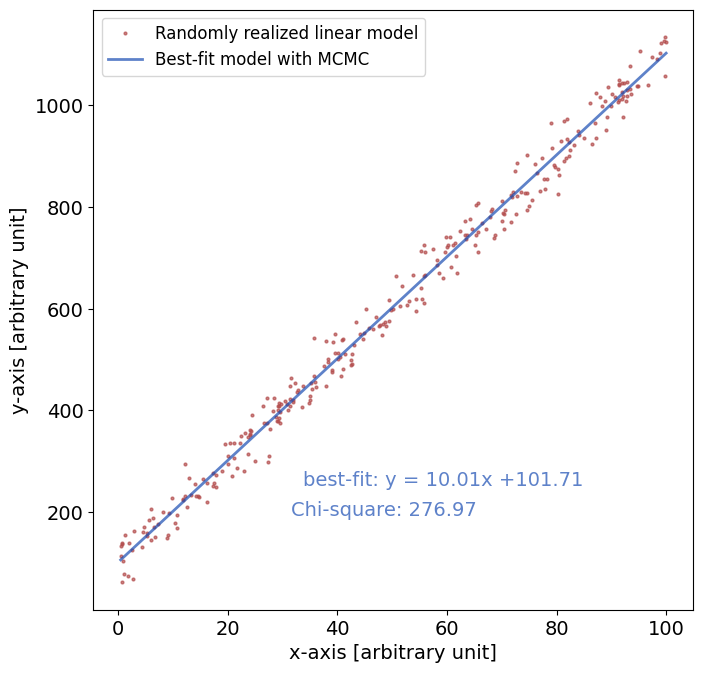

In [22]:
# Initializing Figure ############################################
fig = plt.figure(
                 figsize = (8, 8)
                )
ax = fig.add_axes([0.12, 0.1, 0.75, 0.75])

# Set the x/y axis title and legend
plt.xlabel('x-axis [arbitrary unit]', size = 14.0)
plt.ylabel('y-axis [arbitrary unit]', size = 14.0)

plt.xscale('linear')
plt.yscale('linear')
#plt.xscale('linear')
#plt.yscale('linear')
plt.rc('font', size=14.0)          # controls default text sizes
plt.rc('xtick', labelsize=14.0)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14.0)    # fontsize of the tick labels
##################################################################

# label chi-square
chi2 = chisquare(df_read.y, df_read.y_err, myline(df_read.x, mcmc_a[1], mcmc_b[1] ) )
label_string = 'Chi-square: ' + str( round(chi2, 2) )
plt.text(0.33, 0.15, 
         label_string,
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes,
         fontsize=14)

# plot data
plt.plot(df_read.x, df_read.y,
         'o', markersize = 2.0,
         color = (0.7, 0.3, 0.3, 0.7),
         label = "Randomly realized linear model"
        )

# plot model
x_sort = np.sort(df_read.x)
plt.plot(x_sort, myline(x_sort, mcmc_a[1], mcmc_b[1]),
         '-', linewidth = 2.0,
         color = (0.1, 0.3, 0.7, 0.7),
         label = "Best-fit model with MCMC"
        )

# text labeling
label_string = 'best-fit: y = ' + str( round(mcmc_a[1], 2) ) + 'x' + \
                              ' +' + str( round(mcmc_b[1], 2) )
plt.text(0.35, 0.2, # location of the text label
         label_string, # content of the label
         color = (0.1, 0.3, 0.7, 0.7),
         verticalalignment = 'bottom', horizontalalignment = 'left',
         transform = ax.transAxes, # use relative coordinates
         fontsize=14)

# Setting the figure legend 
plt.legend(loc=2, fontsize=12)

# PDF file output
plt.savefig('MCMC_modeldata_1dpoly.pdf', 
            transparent = True
           )